In [60]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier

# Import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,\
accuracy_score, plot_roc_curve, roc_auc_score, recall_score, \
precision_score, f1_score, classification_report

# Import Lazypredict
from lazypredict.Supervised import LazyClassifier

# SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Scaler
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('cheap_train_sample.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,United-States,<=50K
1,28,Private,96226,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,45,United-States,<=50K
2,33,Private,251120,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,7688,0,50,United-States,>50K
3,26,Private,178140,Bachelors,13,Married-civ-spouse,Other-service,Husband,Male,0,0,45,United-States,>50K
4,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,Female,14084,0,55,United-States,>50K


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'wage'],
      dtype='object')

In [5]:
df.shape

(6513, 14)

In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
wage              object
dtype: object

In [7]:
df.select_dtypes(include='object').nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
sex                2
native-country    41
wage               2
dtype: int64

In [8]:
df['education'].value_counts()

 HS-grad         2103
 Some-college    1451
 Bachelors       1113
 Masters          334
 Assoc-voc        250
 11th             225
 Assoc-acdm       222
 10th             175
 7th-8th          142
 9th              106
 Prof-school      103
 12th              89
 Doctorate         81
 5th-6th           79
 1st-4th           27
 Preschool         13
Name: education, dtype: int64

In [9]:
df.isnull().sum()[df.isnull().sum() != 0]

Series([], dtype: int64)

In [10]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,United-States,<=50K
1,28,Private,96226,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,45,United-States,<=50K
2,33,Private,251120,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,7688,0,50,United-States,>50K
3,26,Private,178140,Bachelors,13,Married-civ-spouse,Other-service,Husband,Male,0,0,45,United-States,>50K
4,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,Female,14084,0,55,United-States,>50K


In [11]:
df['wage'].value_counts()

 <=50K    4945
 >50K     1568
Name: wage, dtype: int64

In [12]:
df['sex'].value_counts()

 Male      4326
 Female    2187
Name: sex, dtype: int64

In [13]:
df['wage'] = df['wage'].map({' >50K':1, ' <=50K':0})
df['native-country'] = df['native-country'].map(lambda x: 1 if x ==' United-States' else 0)
df['sex'] = df['sex'].map({' Male':1, ' Female':0})
# wage 1: >50k
# wage 0: <=50k

# native 1 : US
# native 0 : non US

# sex 1: Male
# sex 0: Female

In [14]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,1,0,0,40,1,0
1,28,Private,96226,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,1,0,0,45,1,0
2,33,Private,251120,Bachelors,13,Married-civ-spouse,Sales,Husband,1,7688,0,50,1,1
3,26,Private,178140,Bachelors,13,Married-civ-spouse,Other-service,Husband,1,0,0,45,1,1
4,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,0,14084,0,55,1,1


In [15]:
df.shape

(6513, 14)

In [16]:
df['native-country'].value_counts(normalize=True).mul(100).round(2)

1   89.16
0   10.84
Name: native-country, dtype: float64

In [17]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex                int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int64
wage               int64
dtype: object

In [18]:
X = df.drop(columns=['wage'])
X = pd.get_dummies(X,drop_first=True)
y = df['wage']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
y_train.value_counts(normalize=True).mul(100).round(2)

0   75.90
1   24.10
Name: wage, dtype: float64

In [21]:
y_test.value_counts(normalize=True).mul(100).round(2)

0   76.00
1   24.00
Name: wage, dtype: float64

### Random Forest without tuning

In [22]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_preds = rfc.predict(X_test)

In [23]:
def classifier_metric(model, X_train , y_train, y_test, y_preds):
    training_acc = accuracy_score(y_train, model.predict(X_train))
    testing_acc = accuracy_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds,average='macro')
    print(f"Training accuracy: {training_acc}")
    print(f"Test accuracy: {testing_acc}")
    print(f"F1 score: {f1}")

In [24]:
classifier_metric(rfc, X_train, y_train, y_test, y_preds)

Training accuracy: 1.0
Test accuracy: 0.8348680171884592
F1 score: 0.7560352194815064


### Random Forest tuning

In [25]:
for i in [100, 150, 200, 300]:
    for k in [10, 12, 14, 15]:
        rfc = RandomForestClassifier(max_depth=k,n_estimators=i, random_state=42)
        rfc.fit(X_train, y_train)
        y_preds = rfc.predict(X_test)
        print(f"Max_dept: {k}, n_estimator: {i}")
        classifier_metric(rfc, X_train, y_train, y_test, y_preds)
        print(f"\n")

Max_dept: 10, n_estimator: 100
Training accuracy: 0.8814496314496314
Test accuracy: 0.8453038674033149
F1 score: 0.7583985046306542


Max_dept: 12, n_estimator: 100
Training accuracy: 0.8966011466011466
Test accuracy: 0.848987108655617
F1 score: 0.7683779159827064


Max_dept: 14, n_estimator: 100
Training accuracy: 0.9191236691236692
Test accuracy: 0.8422344996930632
F1 score: 0.7572104190286746


Max_dept: 15, n_estimator: 100
Training accuracy: 0.9295659295659295
Test accuracy: 0.8483732351135667
F1 score: 0.7671775844999152


Max_dept: 10, n_estimator: 150
Training accuracy: 0.883087633087633
Test accuracy: 0.8453038674033149
F1 score: 0.7583985046306542


Max_dept: 12, n_estimator: 150
Training accuracy: 0.8976248976248976
Test accuracy: 0.8459177409453652
F1 score: 0.7623466638767558


Max_dept: 14, n_estimator: 150
Training accuracy: 0.923013923013923
Test accuracy: 0.8434622467771639
F1 score: 0.7601702269172612


Max_dept: 15, n_estimator: 150
Training accuracy: 0.9318181818181

In [26]:
dtc = DecisionTreeClassifier(max_depth=10, random_state=42)
dtc.fit(X_train, y_train)
y_preds = dtc.predict(X_test)
classifier_metric(dtc, X_train, y_train, y_test, y_preds)

Training accuracy: 0.8945536445536445
Test accuracy: 0.8317986494782075
F1 score: 0.7604566043406392


In [27]:
class_0 = df[df['wage'] ==0]

In [28]:
class_1 = df[df['wage'] ==1]
class_1.shape

(1568, 14)

In [29]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,1,0,0,40,1,0
1,28,Private,96226,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,1,0,0,45,1,0
2,33,Private,251120,Bachelors,13,Married-civ-spouse,Sales,Husband,1,7688,0,50,1,1
3,26,Private,178140,Bachelors,13,Married-civ-spouse,Other-service,Husband,1,0,0,45,1,1
4,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,0,14084,0,55,1,1


In [30]:
class_0_sample = class_0.sample(2_000, random_state=42)
class_0_sample.shape

(2000, 14)

In [31]:
df_new = pd.concat([class_0_sample,class_1])
df_new.shape

(3568, 14)

In [32]:
df_new[(df_new['capital-gain'] != 0)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
4874,46,Self-emp-not-inc,51271,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,1,4386,0,70,1,0
2450,24,Private,103277,HS-grad,9,Never-married,Adm-clerical,Not-in-family,0,2597,0,40,1,0
3489,22,Private,190968,Some-college,10,Married-civ-spouse,Craft-repair,Husband,1,2407,0,40,1,0
251,24,Private,196816,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,1,3908,0,40,1,0
2691,65,Private,113323,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,1,3818,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6462,62,Private,122246,Some-college,10,Never-married,Craft-repair,Not-in-family,0,8614,0,39,1,1
6478,61,Private,85548,Some-college,10,Married-civ-spouse,Tech-support,Husband,1,15024,0,18,1,1
6487,54,Private,154728,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,1,7688,0,40,1,1
6506,28,Private,37359,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,1,99999,0,50,1,1


In [33]:
X = df_new.drop(columns=['wage'])
X = pd.get_dummies(X, drop_first=True)
y = df_new['wage']

In [34]:
X.columns

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
   

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
for i in [100, 150, 200, 300]:
    for k in [15, 16, 18]:
        rfc = RandomForestClassifier(max_depth=k,n_estimators=i, random_state=42)
        rfc.fit(X_train, y_train)
        y_preds = rfc.predict(X_test)
        print(f"Max_dept: {k}, n_estimator: {i}")
        classifier_metric(rfc, X_train, y_train, y_test, y_preds)
        print(f"\n")

Max_dept: 15, n_estimator: 100
Training accuracy: 0.9360986547085202
Test accuracy: 0.8295964125560538
F1 score: 0.8286583732250905


Max_dept: 16, n_estimator: 100
Training accuracy: 0.945440956651719
Test accuracy: 0.8262331838565022
F1 score: 0.8253055510279377


Max_dept: 18, n_estimator: 100
Training accuracy: 0.9697309417040358
Test accuracy: 0.8374439461883408
F1 score: 0.8361588147292389


Max_dept: 15, n_estimator: 150
Training accuracy: 0.9398355754857997
Test accuracy: 0.8385650224215246
F1 score: 0.8374462786071163


Max_dept: 16, n_estimator: 150
Training accuracy: 0.9476831091180867
Test accuracy: 0.8340807174887892
F1 score: 0.8331108414239481


Max_dept: 18, n_estimator: 150
Training accuracy: 0.9674887892376681
Test accuracy: 0.8340807174887892
F1 score: 0.832930897457314


Max_dept: 15, n_estimator: 200
Training accuracy: 0.9417040358744395
Test accuracy: 0.8329596412556054
F1 score: 0.8319541081523272


Max_dept: 16, n_estimator: 200
Training accuracy: 0.951046337817

In [37]:
# Oversampling
class_0 = df[df['wage'] == 0]
class_1 = df[df['wage'] == 1]
class_1_sample = class_1.sample(3_300,replace=True, random_state=42) 
df_new = pd.concat([class_1_sample,class_0])
df_new = pd.concat([df_new,class_1])
X = df_new.drop(columns=['wage'])
X = pd.get_dummies(X, drop_first=True)
y = df_new['wage']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Oversampling (Correctly)

In [38]:
X = df.drop(columns=['wage'])
X = pd.get_dummies(X, drop_first=True)
y = df['wage']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
class_1_X = X_train[y_train==1]
class_0_X = X_train[y_train==0]

In [40]:
class_1_sample_X = class_1_X.sample(3_000,replace=True, random_state=42)
class_1_sample_X.shape

(3000, 56)

In [41]:
y_sample = pd.Series([1 for i in range(3000)])

In [42]:
X_train_new = pd.concat([X_train,class_1_sample_X])
y_train_new = pd.concat([y_train,y_sample])

In [43]:
# Tuning Random Forest
for i in [100, 150, 200, 300]:
    for k in [7, 8, 9, 10]:
        rfc = RandomForestClassifier(max_depth=k,n_estimators=i, random_state=42)
        rfc.fit(X_train, y_train)
        y_preds = rfc.predict(X_test)
        print(f"Max_dept: {k}, n_estimator: {i}")
        classifier_metric(rfc, X_train, y_train, y_test, y_preds)
        print(f"\n")

Max_dept: 7, n_estimator: 100
Training accuracy: 0.8609746109746109
Test accuracy: 0.8367096378146102
F1 score: 0.7395348445795182


Max_dept: 8, n_estimator: 100
Training accuracy: 0.8683456183456183
Test accuracy: 0.8379373848987108
F1 score: 0.7457215836526181


Max_dept: 9, n_estimator: 100
Training accuracy: 0.8748976248976249
Test accuracy: 0.8422344996930632
F1 score: 0.7515980028302138


Max_dept: 10, n_estimator: 100
Training accuracy: 0.8814496314496314
Test accuracy: 0.8453038674033149
F1 score: 0.7583985046306542


Max_dept: 7, n_estimator: 150
Training accuracy: 0.8636363636363636
Test accuracy: 0.8416206261510129
F1 score: 0.747368383088405


Max_dept: 8, n_estimator: 150
Training accuracy: 0.8683456183456183
Test accuracy: 0.8391651319828115
F1 score: 0.7458737031638516


Max_dept: 9, n_estimator: 150
Training accuracy: 0.8765356265356266
Test accuracy: 0.8446899938612645
F1 score: 0.7554641817744907


Max_dept: 10, n_estimator: 150
Training accuracy: 0.883087633087633
T

In [44]:
# Tuning Random Forest(2)
for i in [100]:
    for k in [7,8,9,10,12,13,14, 15]:
        rfc = RandomForestClassifier(max_depth=k,n_estimators=i, random_state=42, class_weight={0:3, 1:2})
        rfc.fit(X_train_new, y_train_new)
        y_preds = rfc.predict(X_test)
        print(f"Max_dept: {k}, n_estimator: {i}")
        classifier_metric(rfc, X_train_new, y_train_new, y_test, y_preds)
        print(f"\n")

Max_dept: 7, n_estimator: 100
Training accuracy: 0.8484271943176053
Test accuracy: 0.8189073050951504
F1 score: 0.7764383186922232


Max_dept: 8, n_estimator: 100
Training accuracy: 0.8548959918822933
Test accuracy: 0.8127685696746471
F1 score: 0.7726926481790295


Max_dept: 9, n_estimator: 100
Training accuracy: 0.8763318112633182
Test accuracy: 0.8207489257213014
F1 score: 0.7825171730176961


Max_dept: 10, n_estimator: 100
Training accuracy: 0.8880010147133435
Test accuracy: 0.8195211786372008
F1 score: 0.780200282708865


Max_dept: 12, n_estimator: 100
Training accuracy: 0.915271435819381
Test accuracy: 0.8219766728054021
F1 score: 0.7809484859613395


Max_dept: 13, n_estimator: 100
Training accuracy: 0.9270674784373415
Test accuracy: 0.8207489257213014
F1 score: 0.7776786916139453


Max_dept: 14, n_estimator: 100
Training accuracy: 0.9378488077118214
Test accuracy: 0.8268876611418048
F1 score: 0.7826372091438695


Max_dept: 15, n_estimator: 100
Training accuracy: 0.947488584474885

In [45]:
X = df.drop(columns=['wage','workclass','relationship'])
y = df['wage']
X = pd.get_dummies(X,drop_first=True)

In [46]:
# Final Random forest model
rfc = RandomForestClassifier(max_depth=7,n_estimators=100, 
                             class_weight={0:3, 1:2},
                             random_state=42)
rfc.fit(X_train_new, y_train_new)
y_preds = rfc.predict(X_test)
classifier_metric(rfc, X_train, y_train, y_test, y_preds)

Training accuracy: 0.8439803439803439
Test accuracy: 0.8189073050951504
F1 score: 0.7764383186922232


In [47]:
# Submission cell
submit = pd.read_csv("test_data.csv")
submit.head()
def clean_func(df):
    df['native-country'] = df['native-country'].map(lambda x: 1 if x ==' United-States' else 0)
    df['sex'] = df['sex'].map({' Male':1, ' Female':0})

clean_func(submit)
X = submit
X = pd.get_dummies(X, drop_first=True)
preds = rfc.predict(X)
pred_df = pd.DataFrame(preds,columns=['wage'])
pred_df.head()

,wage
0,0
1,1
2,0
3,1
4,0


# Manual Search for optimal model

## Logistic Regression

In [51]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [52]:
y_preds = model.predict(X_test)

In [53]:
# Baseline Accuracy = 76%
1 - y_train.mean()

0.759009009009009

In [54]:
# Training Score
model.score(X_train, y_train)

0.8294430794430795

In [55]:
# Training Score
model.score(X_test, y_test)

0.8182934315531001

In [56]:
f1_score(y_test, y_preds)

0.5672514619883041

## Neural Network

In [64]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [65]:
X_train_sc.shape[1]

56

In [66]:
# 1. Model
# Insert model here...
model = Sequential()

# Sequential groups a linear stack of layers into a tf.keras.Model.
# Sequential provides training and inference features on this model.

model.add(Dense(64, activation='relu', input_shape=(X_train_sc.shape[1],)))
model.add(Dense(32, activation='relu'))

# Binary classification
# Output layer with one neuron (node)
model.add(Dense(1, activation='sigmoid'))

In [67]:
# 2. Compile
model.compile(loss='bce', optimizer='adam', metrics=['accuracy'])

In [68]:
# 3. Fit
res = model.fit(X_train_sc, y_train,
                epochs=100,
                batch_size=64,
                validation_data = (X_test_sc, y_test),
                verbose=1) # No printing of output


# verbose: 'auto', 0, 1, or 2. Verbosity mode.
        # 0 = silent, 1 = progress bar, 2 = one line per epoch.

Epoch 1/100
77/77 [==============================] - 1s 6ms/step - loss: 0.4265 - accuracy: 0.7995 - val_loss: 0.3610 - val_accuracy: 0.8318
Epoch 2/100
77/77 [==============================] - 0s 3ms/step - loss: 0.3401 - accuracy: 0.8454 - val_loss: 0.3449 - val_accuracy: 0.8324
Epoch 3/100
77/77 [==============================] - 0s 3ms/step - loss: 0.3226 - accuracy: 0.8483 - val_loss: 0.3377 - val_accuracy: 0.8336
Epoch 4/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8559 - val_loss: 0.3347 - val_accuracy: 0.8355
Epoch 5/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3000 - accuracy: 0.8569 - val_loss: 0.3332 - val_accuracy: 0.8410
Epoch 6/100
77/77 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.8600 - val_loss: 0.3306 - val_accuracy: 0.8422
Epoch 7/100
77/77 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8634 - val_loss: 0.3329 - val_accuracy: 0.8379
Epoch 8/100
7

Epoch 59/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1428 - accuracy: 0.9419 - val_loss: 0.5347 - val_accuracy: 0.8201
Epoch 60/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.9412 - val_loss: 0.5366 - val_accuracy: 0.8097
Epoch 61/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.9416 - val_loss: 0.5466 - val_accuracy: 0.8214
Epoch 62/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1381 - accuracy: 0.9404 - val_loss: 0.5527 - val_accuracy: 0.8158
Epoch 63/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1372 - accuracy: 0.9425 - val_loss: 0.5799 - val_accuracy: 0.8244
Epoch 64/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1394 - accuracy: 0.9396 - val_loss: 0.5711 - val_accuracy: 0.8207
Epoch 65/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9439 - val_loss: 0.5717 - val_accuracy: 0.8165
Epoch 

In [69]:
preds = model.predict(X_test_sc)

51/51 [==============================] - 0s 1ms/step


In [70]:
preds = (preds > 0.5).astype("int32")

In [71]:
preds

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [72]:
f1_score(y_test, preds)

0.62

In [73]:
y_test

5777    0
1339    1
1192    0
1881    0
3214    0
       ..
3887    0
1168    1
2921    0
2899    0
4317    0
Name: wage, Length: 1629, dtype: int64

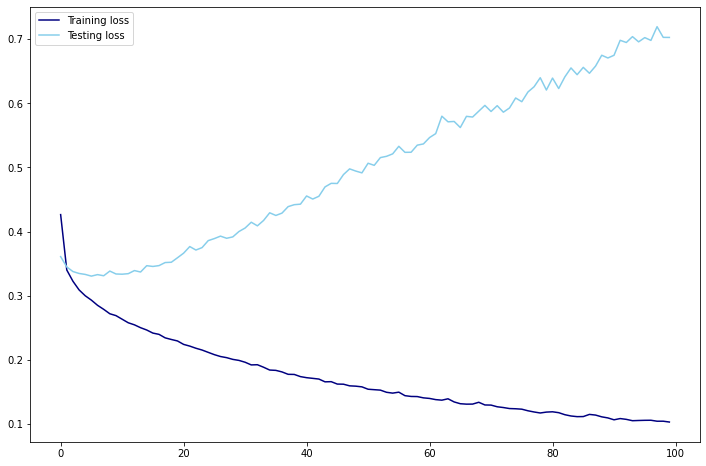

In [74]:
# Visualize the loss
train_loss = res.history['loss']
test_loss = res.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

# Auto Search for Model

In [75]:
# pip install lazypredict

In [76]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:13<00:00,  2.14it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.79               0.79     0.79      0.80   
PassiveAggressiveClassifier        0.79               0.78     0.78      0.80   
LGBMClassifier                     0.85               0.77     0.77      0.85   
BernoulliNB                        0.81               0.76     0.76      0.82   
XGBClassifier                      0.84               0.76     0.76      0.84   
AdaBoostClassifier                 0.85               0.75     0.75      0.84   
RandomForestClassifier             0.84               0.74     0.74      0.83   
BaggingClassifier                  0.84               0.74     0.74      0.83   
LogisticRegression                 0.84               0.73     0.73      0.83   
LinearSVC                          0.84               0.73     0.73      0.83   
Perceptron                  